In [1]:
#import required packages
import pandas as pd
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [2]:
#import data
fifa19 = pd.read_csv('W:/Ckalib.Nelson/HackCville/Homework/fifa19/data.csv')
#first five results 
fifa19.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
#18,207 rows (players) and 89 columns (attributes)
fifa19.shape

(18207, 89)

In [4]:
#view columns in dataset
fifa19.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
#Create a function converting "Overall" into a category for World Class, First Team, etc. players
def overall_category(Overall):
    if Overall > 90:
        return "World Class"
    elif Overall <= 90 and Overall >= 85:
        return "First Team"
    elif Overall <=84 and Overall >= 80:
        return "Above Average"
    elif Overall <=79 and Overall >=70:
        return "Average"
    else:
        return "Below Average"
fifa19['Overall Category'] = fifa19['Overall'].apply(overall_category)
#An additional column from the previous count shows that a column has been added to the dataset
print(fifa19.shape)

(18207, 90)


In [6]:
#Create a function converting "Potential" into a category for potential World Class, First Team, etc. players
def potential_category(Potential):
    if Potential > 90:
        return "World Class"
    elif Potential <= 90 and Potential >= 85:
        return "First Team"
    elif Potential <=84 and Potential >= 80:
        return "Above Average"
    elif Potential <=79 and Potential >=70:
        return "Average"
    else:
        return "Below Average"
fifa19['Potential Category'] = fifa19['Potential'].apply(potential_category)
#An additional column from the previous count shows that a column has been added to the dataset
print(fifa19.shape)

(18207, 91)


In [7]:
#Create a column calculating the differnce between Overall and Potential to see those w/ the most potential opportunity
fifa19['Potential Rise'] = fifa19['Potential'] - fifa19['Overall']
print(fifa19.shape)

(18207, 92)


In [8]:
#Use groupby to determine the average potential rise per overall category
overallGroups = fifa19.groupby('Overall Category')
overallGroups['Potential Rise'].mean()

Overall Category
Above Average    1.883146
Average          2.465473
Below Average    6.268120
First Team       1.247525
World Class      0.444444
Name: Potential Rise, dtype: float64

In [14]:
#Use groupby to determine the average overall, potential, and potential rise per age
ageGroups = fifa19.groupby('Age')
ageGroups['Overall','Potential Rise','Potential'].mean().head(15)

,Overall,Potential Rise,Potential
Age,,,
16,54.452381,18.738095,73.190476
17,56.404844,17.934256,74.339100
18,57.741803,15.788251,73.530055
19,59.583008,13.563477,73.146484
20,61.858871,11.354839,73.213710
21,63.480675,9.477161,72.957836
22,64.994030,7.825373,72.819403
23,66.244745,6.310811,72.555556
24,67.306333,4.773196,72.079529


In [15]:
#create dataframe of world class players
world_class = fifa19[fifa19['Overall Category'] =='World Class']

#create dataframe of first team players
first_team = fifa19[fifa19['Overall Category'] =='First Team']

#create dataframe of first team players
above_average_players = fifa19[fifa19['Overall Category'] =='Above Average']

#create dataframe of average players
average_players = fifa19[fifa19['Overall Category']=='Average']

#create dataframe of those w/ the potential of becoming world class players
potential_world_class = fifa19[(fifa19['Potential Category'] =='World Class') & (fifa19['Overall Category'] !='World Class')]

#create dataframe of those w/ the potential of becoming first team players
potential_first_team = fifa19[(fifa19['Potential Category'] =='First Team') & (fifa19['Overall Category'] !='First Team')]

#create dataframe those w/ the potential of becoming first team players
potential_above_average_players = fifa19[(fifa19['Potential Category'] =='Above Average') & (fifa19['Overall Category'] !='Above Average')]

#create dataframe those w/ the potential of becoming average players
potential_average_players = fifa19[(fifa19['Potential Category']=='Average') & (fifa19['Overall Category'] !='Average')]

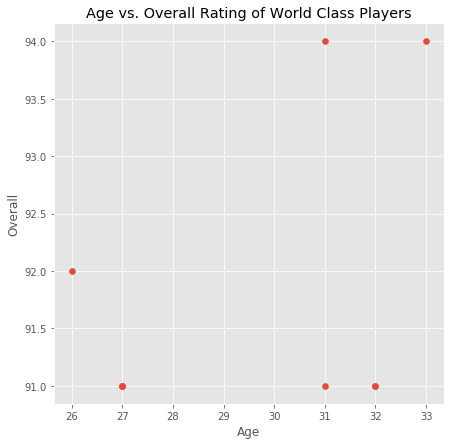

In [16]:
#plot scatter plot of relationship between Age and Overall of world class players
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.scatter(world_class[['Age']],world_class[['Overall']])
plt.ylabel('Overall')
plt.xlabel('Age')
plt.title('Age vs. Overall Rating of World Class Players')
plt.show()

#no significant relationship between the two variables

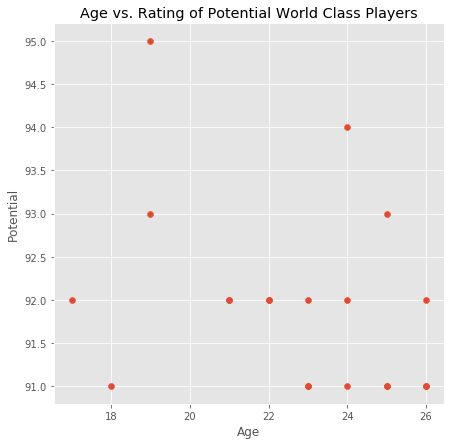

In [20]:
#plot scatter plot of relationship between Age and Potential of world class players
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.scatter(potential_world_class[['Age']],potential_world_class[['Potential']])
plt.ylabel('Potential')
plt.xlabel('Age')
plt.title('Age vs. Rating of Potential World Class Players')
plt.show()

#seemingly no significant relationship between the two variables

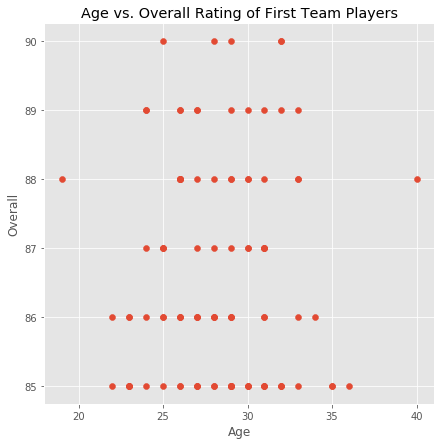

In [21]:
#plot scatter plot of relationship between Age and Overall of first team players
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.scatter(first_team[['Age']],first_team[['Overall']])
plt.ylabel('Overall')
plt.xlabel('Age')
plt.title('Age vs. Overall Rating of First Team Players')
plt.show()

#no significant relationship between the two variables

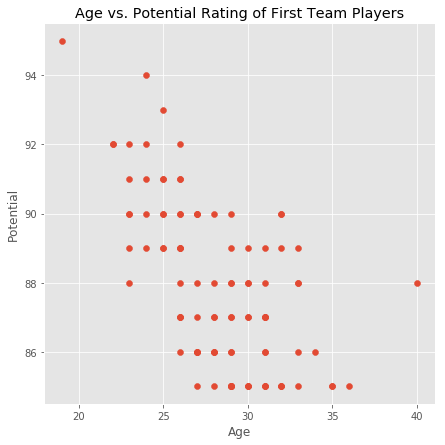

In [22]:
#plot scatter plot of relationship between Age and Potential of first team players
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.scatter(first_team[['Age']],first_team[['Potential']])
plt.ylabel('Potential')
plt.xlabel('Age')
plt.title('Age vs. Potential Rating of First Team Players')
plt.show()
#significant relationship between the two variables

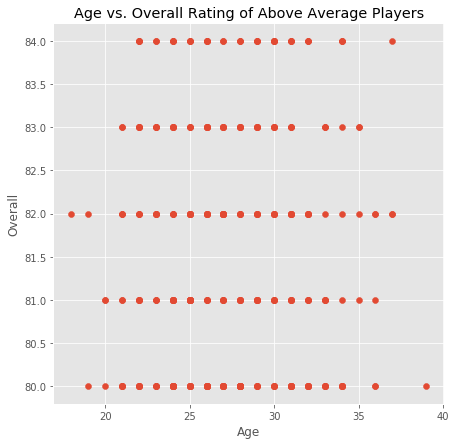

In [23]:
#plot scatter plot of relationship between Age and Overall of above average players
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.scatter(above_average_players[['Age']],above_average_players[['Overall']])
plt.ylabel('Overall')
plt.xlabel('Age')
plt.title('Age vs. Overall Rating of Above Average Players')
plt.show()

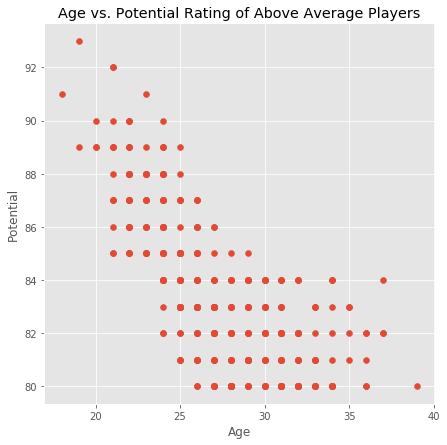

In [24]:
#plot scatter plot of relationship between Age and Potential of above average players
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.scatter(above_average_players[['Age']],above_average_players[['Potential']])
plt.ylabel('Potential')
plt.xlabel('Age')
plt.title('Age vs. Potential Rating of Above Average Players')
plt.show()
#significant relationship between the two variables

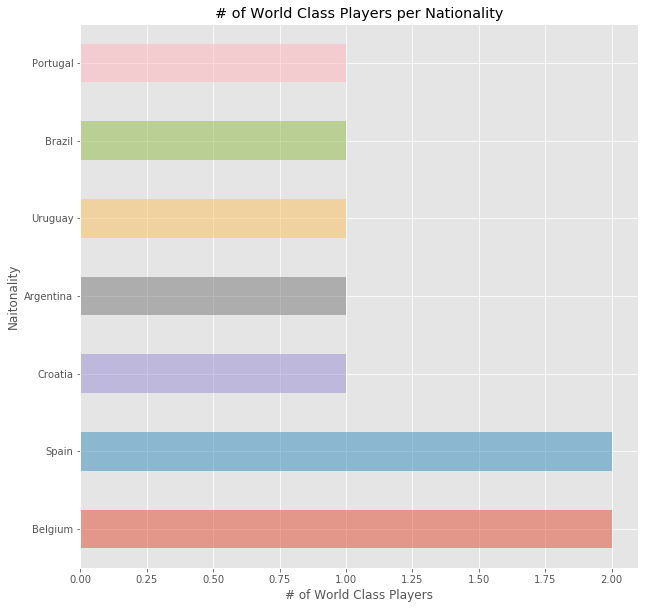

In [18]:
#visualize nationalities w/ the most world class players
world_class['Nationality'].value_counts().plot(kind='barh',alpha=0.5,figsize=(10,10))
plt.title('# of World Class Players per Nationality')
plt.xlabel('# of World Class Players')
plt.ylabel('Naitonality')
plt.show()

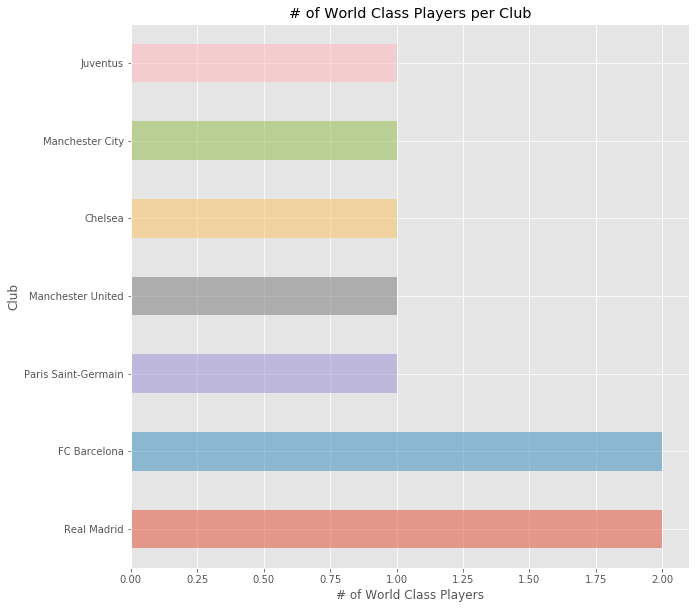

In [25]:
#visualize clubs w/ the most world class players
world_class['Club'].value_counts().plot(kind='barh',alpha=0.5,figsize=(10,10))
plt.title('# of World Class Players per Club')
plt.xlabel('# of World Class Players')
plt.ylabel('Club')
plt.show()

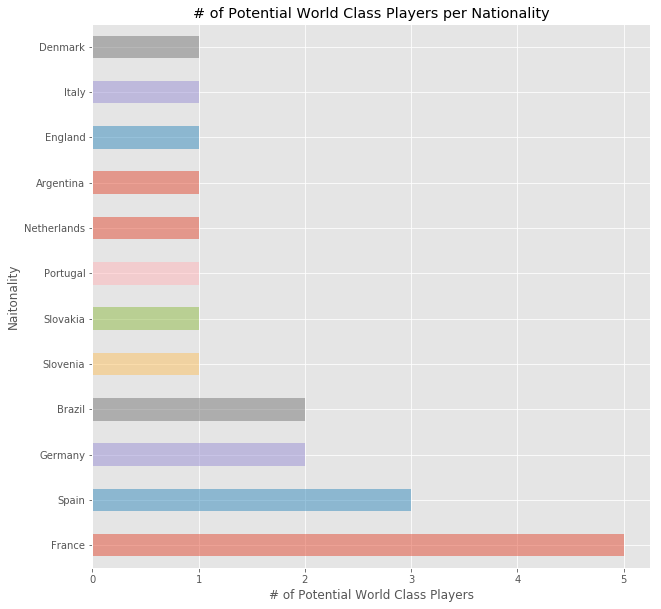

In [41]:
#visualize nationalities w/ the most potential world class players
potential_world_class['Nationality'].value_counts().plot(kind='barh',alpha=0.5,figsize=(10,10))
plt.title('# of Potential World Class Players per Nationality')
plt.xlabel('# of Potential World Class Players')
plt.ylabel('Naitonality')
plt.show()

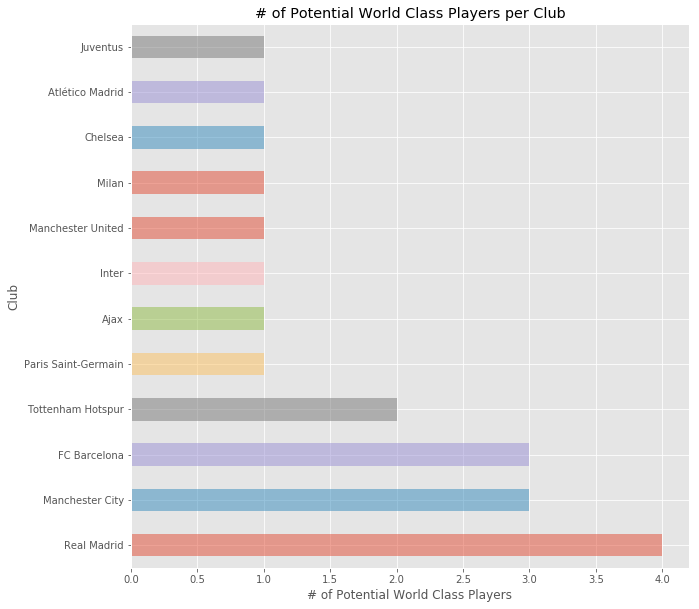

In [26]:
#visualize clubs w/ the most potential world class players
potential_world_class['Club'].value_counts().plot(kind='barh',alpha=0.5,figsize=(10,10))
plt.title('# of Potential World Class Players per Club')
plt.xlabel('# of Potential World Class Players')
plt.ylabel('Club')
plt.show()

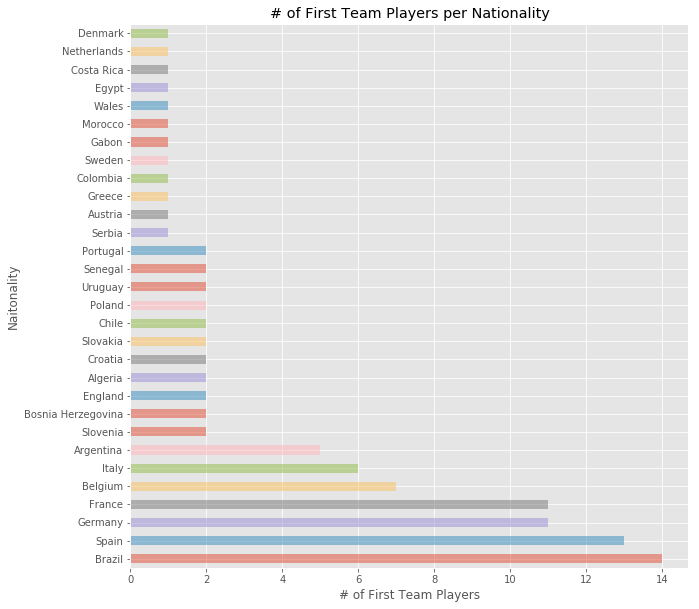

In [19]:
#visualize nationalities w/ the most first team players
first_team['Nationality'].value_counts().plot(kind='barh',alpha=0.5,figsize=(10,10))
plt.title('# of First Team Players per Nationality')
plt.xlabel('# of First Team Players')
plt.ylabel('Naitonality')
plt.show()

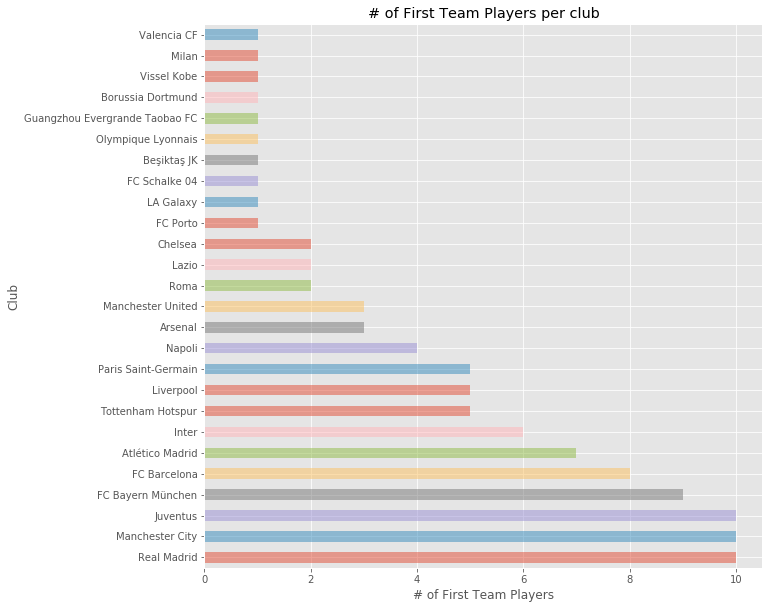

In [27]:
#visualize clubs w/ the most first team players
first_team['Club'].value_counts().plot(kind='barh',alpha=0.5,figsize=(10,10))
plt.title('# of First Team Players per club')
plt.xlabel('# of First Team Players')
plt.ylabel('Club')
plt.show()

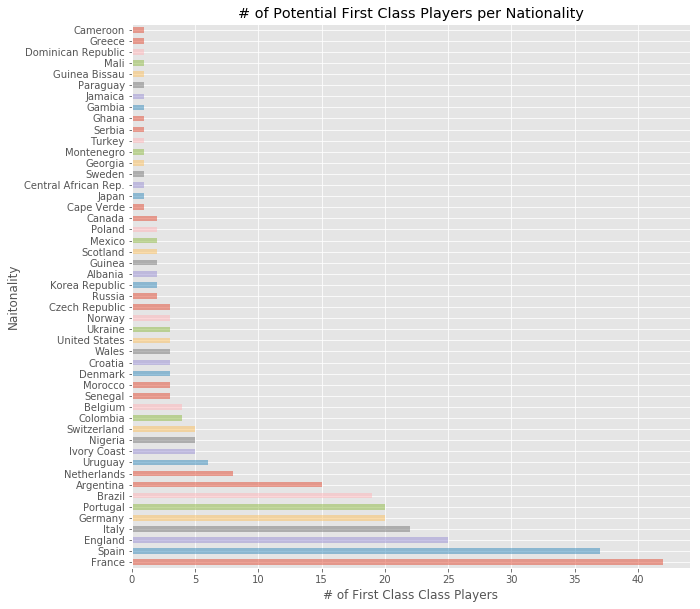

In [30]:
#visualize nationalities w/ the most potential world class players
potential_first_team['Nationality'].value_counts().plot(kind='barh',alpha=0.5,figsize=(10,10))
plt.title('# of Potential First Class Players per Nationality')
plt.xlabel('# of First Class Class Players')
plt.ylabel('Naitonality')
plt.show()

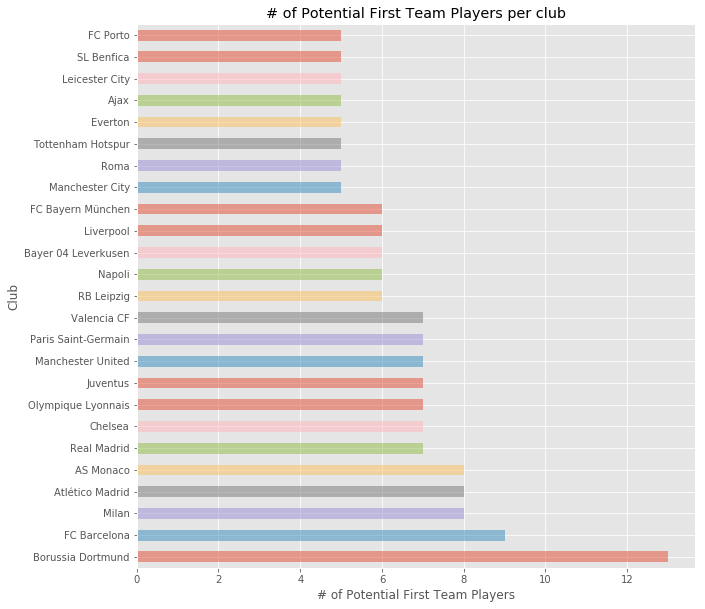

In [32]:
#visualize clubs w/ the most potential first team players
potential_first_team['Club'].value_counts().head(25).plot(kind='barh',alpha=0.5,figsize=(10,10))
plt.title('# of Potential First Team Players per club')
plt.xlabel('# of Potential First Team Players')
plt.ylabel('Club')
plt.show()